In [1]:
#MODULE NAME
import os
import matplotlib as mpl
import matplotlib.colors as colors
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import skimage.exposure as exposure
import pandas as pd
import numpy as np
import subprocess
import snappy
import imageio
import rasterio as rio
import rasterstats as rs
import rasterio.plot 
from glob import iglob
import geopandas as gpd
from pyspatialml import Raster
import seaborn as sns
from rasterio.plot import show
get_ipython().run_line_magic('matplotlib', 'inline')
from osgeo import gdal
import prosail
from prosail import spectral_lib
import numpy as np
import numpy.matlib
import numpy as np
from numpy.random import seed
from numpy.random import rand
import numpy.matlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from yellowbrick.regressor import PredictionError
from yellowbrick.regressor import ResidualsPlot
from sklearn.pipeline import Pipeline

In [18]:
dataframe = r"C:\Users\bongo\OneDrive\Desktop\Boostraping\PLSR\dataset1.xlsx"
df = pd.read_excel(dataframe)
df.shape

(149, 2102)

In [19]:
X = df.iloc[:, 1:]
y = df.iloc[:,0]

In [20]:
RF_bands = df[[514, 519, 521, 522, 533, 564, 567, 569, 574, 607, 608, 609, 693, 704, 708, 709, 713]]
#y_data = df[["carotenoid"]]

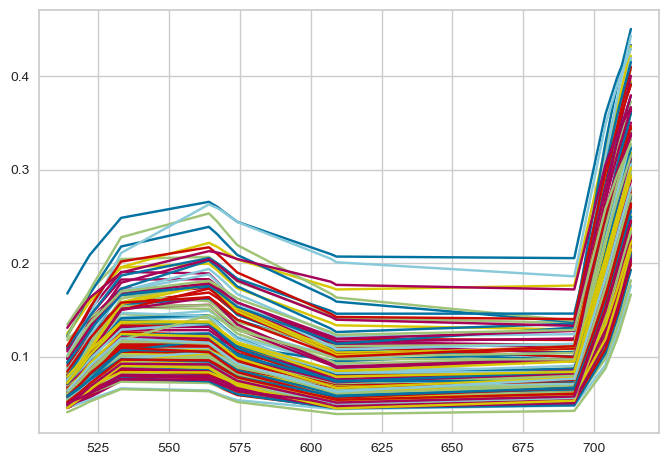

In [21]:
plt.plot(RF_bands.T);

In [22]:
np.random.seed(0)
krange=100000
n= 1.2
chloro= 5 + rand(krange)*80
caroten= 2 + rand(krange)*15
brown=0
EWT=rand(krange)*0.15
LMA=rand(krange)*0.05

In [23]:
rho = np.zeros((krange,2101))
for i in range(krange):
    wl, rho[i,:], tau = prosail.run_prospect(n, chloro[i], caroten[i], brown, EWT[i], LMA[i], prospect_version='5')

In [8]:
df1 = pd.DataFrame(rho.reshape(-1, 2101), columns=list(wl))
#pd_traits0500.columns = ["cab","cw","cm","lai"]
df1 = df1[[514, 519, 521, 522, 533, 564, 567, 569, 574, 607, 608, 609, 693, 704, 708, 709, 713]]
df1

,514,519,521,522,533,564,567,569,574,607,608,609,693,704,708,709,713
0,0.042631,0.048394,0.051275,0.052786,0.065537,0.062210,0.059459,0.057440,0.052543,0.040662,0.040336,0.040010,0.041750,0.096579,0.123438,0.130105,0.156367
1,0.037115,0.040049,0.041874,0.042901,0.054025,0.054742,0.052177,0.050329,0.045972,0.036268,0.036028,0.035793,0.037601,0.090591,0.122653,0.131082,0.166088
2,0.041692,0.046902,0.049501,0.050854,0.061458,0.056162,0.053783,0.052046,0.047870,0.037947,0.037685,0.037425,0.039208,0.085981,0.110067,0.116090,0.139931
3,0.062422,0.076568,0.082236,0.084908,0.094817,0.069375,0.065984,0.063497,0.057478,0.043019,0.042621,0.042220,0.043907,0.113515,0.148792,0.157704,0.193488
4,0.047691,0.056015,0.060071,0.062198,0.081820,0.084081,0.080154,0.077236,0.070029,0.051620,0.051074,0.050517,0.052090,0.132058,0.167057,0.175596,0.208879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.044151,0.051513,0.055007,0.056775,0.067253,0.054298,0.051752,0.049918,0.045607,0.036051,0.035817,0.035587,0.037400,0.090146,0.122474,0.131004,0.166555
99996,0.053295,0.064182,0.069019,0.071435,0.086946,0.073762,0.070169,0.067524,0.061083,0.045336,0.044893,0.044444,0.046101,0.119858,0.155751,0.164737,0.200566
99997,0.043415,0.049839,0.052721,0.054127,0.059824,0.046039,0.044240,0.042956,0.039967,0.033465,0.033316,0.033174,0.035043,0.070561,0.093465,0.099497,0.124436
99998,0.050962,0.060825,0.065210,0.067391,0.080609,0.066877,0.063689,0.061352,0.055696,0.042107,0.041735,0.041360,0.043070,0.108123,0.140975,0.149246,0.182328


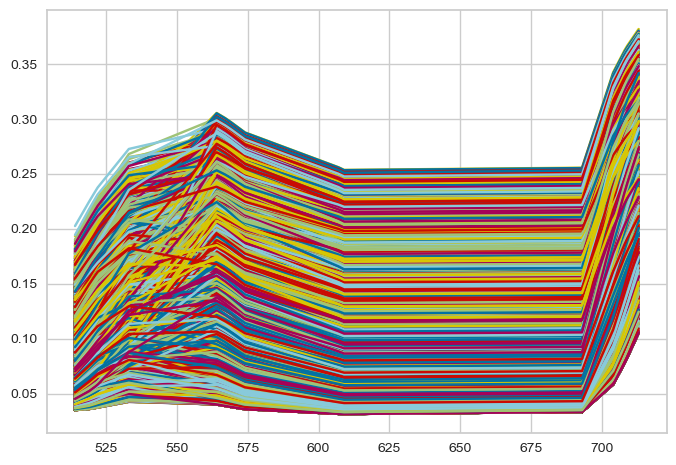

In [9]:
plt.plot(df1.T);

In [24]:
meas=np.array(RF_bands)
car = []
for i in np.arange(149):
    mses=np.sum((np.array(df1)-meas[i,:])**2,axis=1)
    ind=np.argmin(mses)
    car.append(caroten[ind])
    print(ind, mses[ind])
    
car = pd.DataFrame(car, columns = ['caroten'])

40473 0.014252473140180038
38704 0.0034734469715722114
33068 0.0017739255034422189
4993 0.0015902515757407975
13885 0.0032073945046931663
90757 0.0005360091461526613
74688 0.0028362133638542295
19558 0.0010605275767742997
20475 0.0026753099013434654
1599 0.0029962678409420967
32883 0.00016529663358303984
8104 0.0003748513562952809
87291 0.00023771568631744244
67181 0.00032493409677145655
73268 0.00020528428218348258
51829 0.00018000789179161924
48161 0.0003307306677823032
84980 0.00013895405496046982
45083 0.00013613878648769656
99892 0.0003369162254977241
92634 0.00041678947452970946
97660 0.0003513183102868544
74530 0.0003548347388435746
53437 0.000706704906087667
76373 0.0003195140662386242
90296 0.0007466163252725892
6357 0.0005107536615886589
19799 0.0006671347256329244
89958 0.00029273716729012224
6025 0.00012269751856510628
1599 0.004996881018007049
60311 0.002771927412001271
74931 0.00015804350853938065
33430 0.0002153196445237098
41738 0.00030488325472777917
69071 0.0002977361

In [25]:
new_data_simulated = df1.T
new_data_measured = RF_bands.T

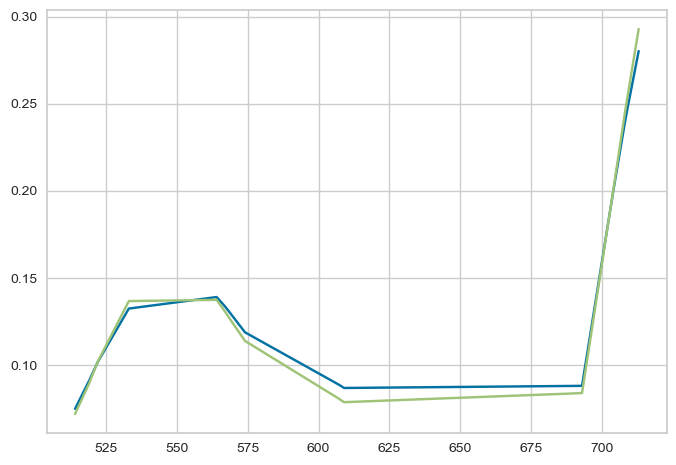

In [27]:
best_simulated = new_data_simulated[[94759]]
plt.plot(best_simulated);
plt.plot(df1.columns,meas[148,:])

In [28]:
carot = pd.concat([y, car], axis = 1)
carot.head()

,carotenoid,caroten
0,3.282087,3.307442
1,4.162009,3.337479
2,4.998477,4.194144
3,5.006669,4.575903
4,3.347456,3.714477


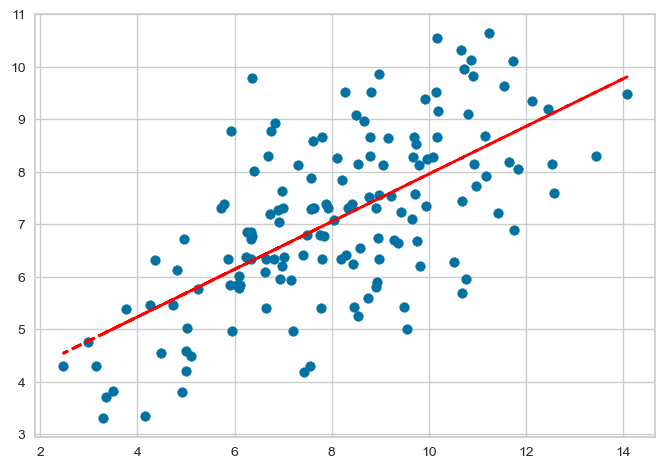

In [29]:
a, b = np.polyfit(carot['carotenoid'], carot['caroten'], deg = 1)
ax1 = carot['carotenoid']
ax2 = carot['caroten']

plt.scatter(ax1, ax2)
plt.plot(ax1, a*ax1+b, color='red', linestyle='--', linewidth=2)

In [15]:
x_car = carot[['carotenoid']]
y_car = carot[['caroten']]

In [16]:
khaya = pd.DataFrame(carot)
import openpyxl as xls
excel_file = pd.ExcelWriter('data4.xlsx')
carot.to_excel(excel_file)
excel_file.save()

C:\Users\bongo\AppData\Local\Temp\ipykernel_16580\2307948425.py:5: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  excel_file.save()


# Hybrid inversion

In [30]:
dataframe = r"C:\Users\bongo\OneDrive\Desktop\Boostraping\PLSR\dataset1.xlsx"
df1 = pd.read_excel(dataframe)

In [31]:
measured_X = df1.iloc[:, 1:]
measured_y = df1.iloc[:,0]

In [60]:
np.random.seed(0)
krange=100000
n= 1.2
chloro= 5 + rand(krange)*80
caroten= 2 + rand(krange)*15
brown=0
EWT=rand(krange)*0.15
LMA=rand(krange)*0.05

In [61]:
rho = np.zeros((krange,2105)) #made it 2102 instaed of 2101 because i included chlorophll, carotenoid, water content and dry matter
for i in range(krange):
    wl, rho[i,0:2101], tau = prosail.run_prospect(n, chloro[i], caroten[i], brown, EWT[i], LMA[i], prospect_version='5')
    rho[i,-4]=chloro[i]
    rho[i,-3]=caroten[i]
    rho[i,-2]=EWT[i]
    rho[i,-1]=LMA[i]
    

In [62]:
wl = range(400, 2505) #made it 2505 instaed of 2501 because i included chlorophll, carotenoid, water content and dry matter

In [63]:
df2 = pd.DataFrame(rho, columns=list(wl))
df2 = df.rename(columns = {2501: 'Chloro'})
df2 = df.rename(columns = {2502: 'caroten'})
df2 = df.rename(columns = {2503: 'EWT'})
df2 = df.rename(columns = {2504: 'LMA'})

In [64]:
df2_selected = df2[[514, 519, 521, 522, 533, 564, 567, 569, 574, 607, 608, 609, 693, 704, 708, 709, 713]]

In [65]:
simulated_X = df2_selected
simulated_y = df2.iloc[:, -3]
measured_X = RF_bands
measured_y = df1.iloc[:,0]

In [82]:
from sklearn.ensemble import RandomForestRegressor
RFReg = RandomForestRegressor(n_estimators=100, random_state=0)
RFReg.fit(simulated_X, simulated_y)
y_pred = RFReg.predict(measured_X)

In [83]:
mse_s=np.sqrt((y_pred-measured_y)**2)
mse_s

0      0.122233
1      0.727243
2      1.329675
3      1.395197
4      0.194552
         ...   
144    0.234466
145    1.445071
146    1.187370
147    1.126062
148    1.552201
Name: carotenoid, Length: 149, dtype: float64

0.6063559070330237


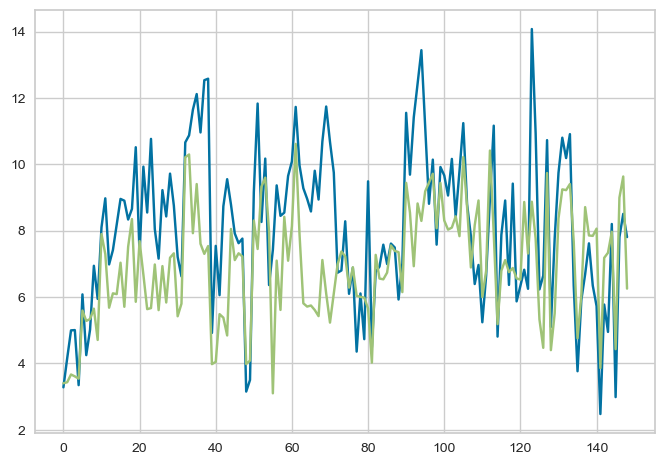

In [84]:
plt.plot(measured_y)
plt.plot(y_pred)
print(np.corrcoef(measured_y,y_pred)[0,1])

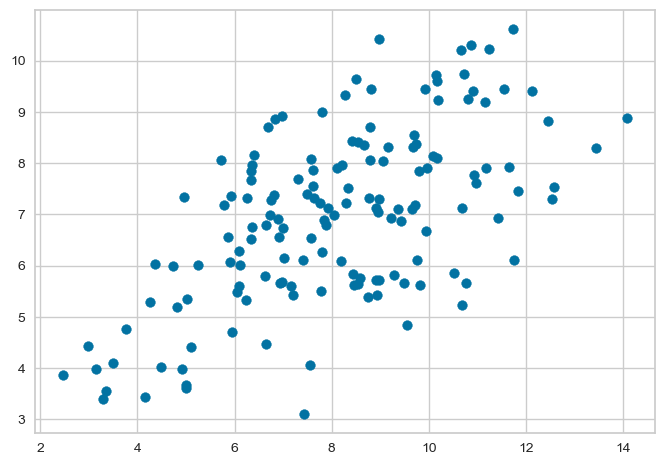

In [69]:
plt.scatter(measured_y,y_pred)

# Random Forest - PROSPECT Model 

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import preprocessing 
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from yellowbrick.regressor import PredictionError
from yellowbrick.regressor import ResidualsPlot
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from numpy import absolute

In [20]:
X_train, X_test, y_train, y_test = train_test_split(RF_bands, car, test_size = 0.30, random_state = 0)
from sklearn.ensemble import RandomForestRegressor
RFReg = RandomForestRegressor(n_estimators=100, max_depth=3, n_jobs=-1, random_state=0)
RFReg.fit(X_train, y_train.values.ravel())
y_pred_RFReg = RFReg.predict(X_test)
from sklearn import metrics
r_square_rf = metrics.r2_score(y_test, y_pred_RFReg)
mse_rf = metrics.mean_squared_error(y_test, y_pred_RFReg)
print('r-square: ', r_square_rf)
print('mse-square: ', mse_rf)

r-square:  0.8786668555218586
mse-square:  0.5345401186996859


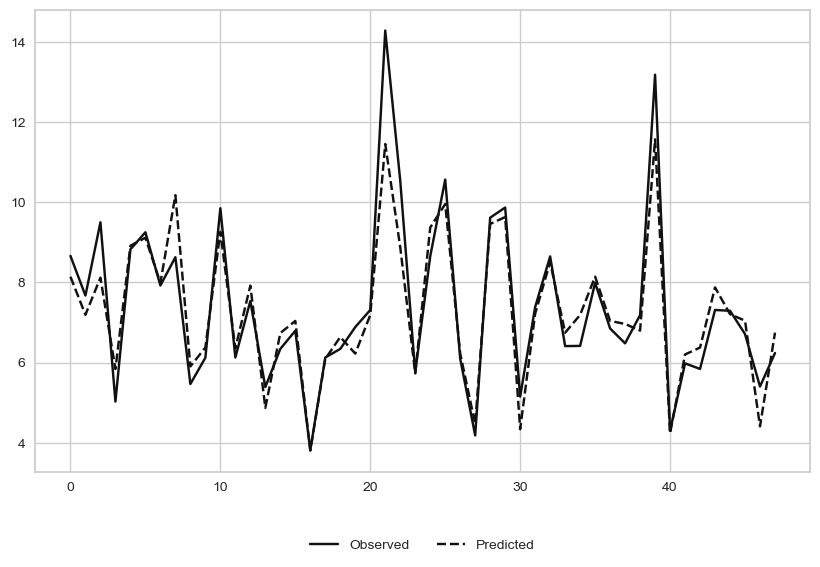

In [21]:
#plotting the observed and precticted data
# setting the boundaries and parameters 
plt.rcParams['figure.figsize'] = (10, 6);
x_ax = range(len(X_test));
#plotting
plt.plot(x_ax, y_test, label = 'Observed', color = 'k', linestyle = '-');
plt.plot(x_ax, y_pred_RFReg, label = 'Predicted', color = 'k', linestyle = '--');
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol = 2, frameon = False);

In [22]:
#a, b = np.polyfit(y_test, y_pred_RFReg, 1)import pandas
d = pd.DataFrame(y_test)
d2 = pd.DataFrame(y_pred_RFReg, columns = ['caroten'])
khaya = pd.concat([d, d2], axis = 1)

In [23]:
a, b = np.polyfit(d['caroten'], d2['caroten'], deg = 1)


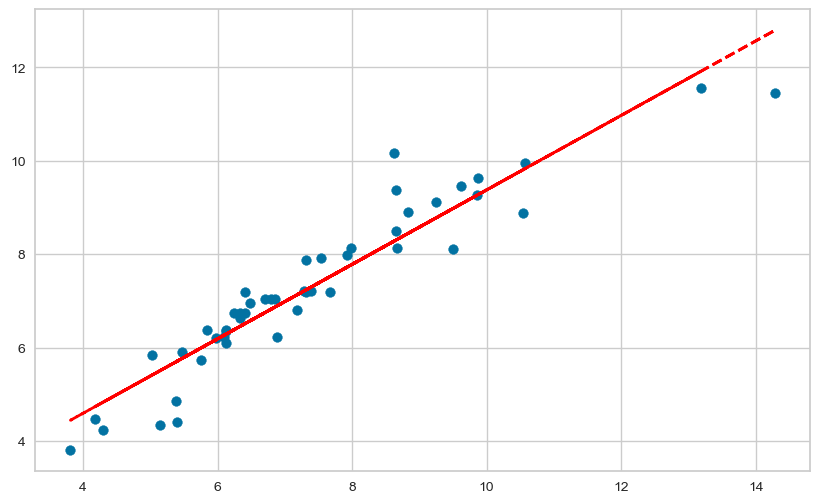

In [27]:
x = d['caroten']
y = d2['caroten']
plt.scatter(x1, y1)
plt.plot(x, a*x+b, color='red', linestyle='--', linewidth=2)
